In [3]:
# Lab 3 Minimizing Cost
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

##  순차형(Sequential) 모델

### Sequential 모델 생성

케라스의 순차형 모델은 정의한 다음 아래의 예제 코드처럼 차례로 계층(layer)을 쌓아 나가면 되는 매우 간단한 구조이다.

In [4]:
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units =1, input_dim =1))

#Gradient Descent (cost가 minimize되는 점 찾기)
sgd = tf.keras.optimizers.SGD(lr=0.1)

### Compilation

Sequential 모델을 정의하고 학습하기 전에 .compile() 메서드를 사용하여 학습에 대한 설정을 해줘야한다. 설정에 필요한 3개의 인자가 있는데 다음과 같다.

1. Optimizer: 최적화 함수를 설정하는 부분이며, 'sgd', 'adam', 'rmsprop' 등 문자열타입으로 설정할 수 있다.

2. Loss function: 손실함수를 설정해주는 부분이며, 'categorical_crossentropy', 'mse' 처럼 문자열타입으로 설정할 수 있다.

3. Metrics: 모델의 성능을 판정하는데 사용하는 지표 함수이며,['accuracy'] 처럼 리스트 형태로 설정한다.

In [5]:
tf.model.compile(loss = 'mse', optimizer = sgd)

tf.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
#fit() trains the model and returns history of train
history = tf.model.fit(x_train, y_train, epochs = 100)

y_predict = tf.model.predict(np.array([5,4]))

Epoch 1/100
1/1 [==============================] - 0s 142ms/step - loss: 2.1792
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 1.0364
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5199
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1762
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1246
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0987
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0846
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0697
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0607
Epoch 13/100
1/1 [==============================] - 0s 2ms/

In [9]:
print(y_predict)

[[-3.9718382]
 [-2.9855099]]


### Graph

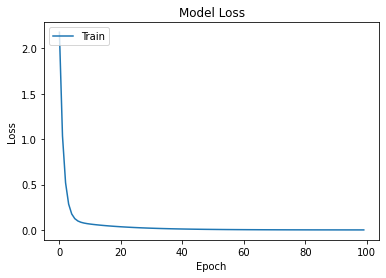

In [11]:
#plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()